<a href="https://www.kaggle.com/fanbyprinciple/fast-fourier-transform-for-blur-detection?scriptVersionId=84734238" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# THE FOURIER TRANSFORM

The Fourier Transform is an important image processing tool which is used to decompose an image into its sine and cosine components. The output of the transformation represents the image in the Fourier or frequency domain, while the input image is the spatial domain equivalent. In the Fourier domain image, each point represents a particular frequency contained in the spatial domain image.

The Fourier Transform is used in a wide range of applications, such as image analysis, image filtering, image reconstruction and image compression.

![](https://i.ytimg.com/vi/4gp-3pFFyPk/hqdefault.jpg)

In [1]:
import matplotlib.pyplot as plt
import numpy as np


What is the Fast Fourier Transform (FFT)?

The FFT is useful in many disciplines, ranging from music, mathematics, science, and engineering. For example, electrical engineers, particularly those working with wireless, power, and audio signals, need the FFT calculation to convert time-series signals into the frequency domain because some calculations are more easily made in the frequency domain. Conversely, a frequency domain signal could be converted back into the time domain using the FFT.

In terms of computer vision, we often think of the FFT as an image processing tool that represents an image in two domains:

1. Fourier (i.e., frequency) domain
2. Spatial domain

# APPLICATION USING FOURIER TRANSFORM : BLUR DETECTION

https://www.pyimagesearch.com/2020/06/15/opencv-fast-fourier-transform-fft-for-blur-detection-in-images-and-video-streams/

In [2]:
def detect_blur_fft(image, size=60, thresh=10, vis=True):
    (h,w) = image.shape
    (cX, cY) = (int(w/2.0), int(h/2.0))
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)
    # check to see if we are visualizing our output
    if vis:
        # compute the magnitude spectrum of the transform
        magnitude = 20 * np.log(np.abs(fftShift))
        # display the original input image
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap="gray")
        ax[0].set_title("Input")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        # display the magnitude image
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitude Spectrum")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        # show our plots
        plt.show()
    
    fftShift[cY - size:cY + size, cX - size:cX + size] = 0
    fftShift = np.fft.ifftshift(fftShift)
    recon = np.fft.ifft2(fftShift)
    
    # compute the magnitude spectrum of the reconstructed image,
    # then compute the mean of the magnitude values
    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)
    # the image will be considered "blurry" if the mean value of the
    # magnitudes is less than the threshold value
    print(mean)
    return (mean, mean <= thresh)

In [3]:
!pip install --upgrade imutils
import imutils
import cv2

  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25860 sha256=2c7bcb2e5d2183d59bceab2d63f410d65c0b16957b4fb675d98ce19510d4481d
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


Lets get an image to test.

![](https://www.photoshopessentials.com/newsite/wp-content/uploads/2018/08/resize-images-print-photoshop-f.jpg)

In [4]:
!wget "https://www.photoshopessentials.com/newsite/wp-content/uploads/2018/08/resize-images-print-photoshop-f.jpg" -O "testimage.jpg"

--2022-01-08 14:10:58--  https://www.photoshopessentials.com/newsite/wp-content/uploads/2018/08/resize-images-print-photoshop-f.jpg
Resolving www.photoshopessentials.com (www.photoshopessentials.com)... 72.10.50.254
Connecting to www.photoshopessentials.com (www.photoshopessentials.com)|72.10.50.254|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12386 (12K) [image/jpeg]
Saving to: ‘testimage.jpg’

testimage.jpg       100%[===================>]  12.10K  --.-KB/s    in 0s      

2022-01-08 14:10:58 (185 MB/s) - ‘testimage.jpg’ saved [12386/12386]



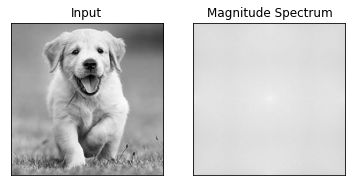

11.771705128201784
[INFO] Not Blurry (11.7717)


In [5]:
orig = cv2.imread("./testimage.jpg")

#print(orig)
orig = imutils.resize(orig, width=500)
gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=60)

# draw on the image, indicating whether or not it is blurry
image = np.dstack([gray] * 3)
color = (0, 0, 255) if blurry else (0, 255, 0)
text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
text = text.format(mean)
cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,color, 2)
print("[INFO] {}".format(text))
# show the output image
#cv2.imshow("Output", image)
#cv2.waitKey(0)

In [6]:
# !pip -q install google-colab
# from google.colab import files
# from io import BytesIO
# from PIL import Image

In [7]:
# INPUT YOUR OWN IMAGE HERE
# uploaded = files.upload()

# im = Image.open(BytesIO(uploaded['./testimage.jpg']))

# #orig = cv2.imread("./testimage.jpg")

# #print(orig)
# orig = imutils.resize(orig, width=500)
# gray = cv2.cvtColor(orig, cv2.COLOR_BGR2GRAY)
# # apply our blur detector using the FFT
# (mean, blurry) = detect_blur_fft(gray, size=60)

# # draw on the image, indicating whether or not it is blurry
# image = np.dstack([gray] * 3)
# color = (0, 0, 255) if blurry else (0, 255, 0)
# text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
# text = text.format(mean)
# cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,color, 2)
# print("[INFO] {}".format(text))

# Lets check by  blurring the image

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


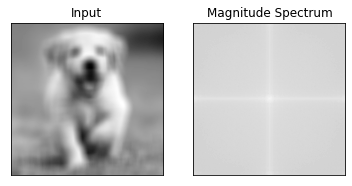

-15.27115790703916
[INFO] Blurry (-15.2712)


In [8]:
orig = cv2.imread("./testimage.jpg")

image_blurred = cv2.blur(src=orig, ksize=(15, 15))
image_blurred = imutils.resize(image_blurred, width=500)
gray = cv2.cvtColor(image_blurred, cv2.COLOR_BGR2GRAY)
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(gray, size=60)

# draw on the image, indicating whether or not it is blurry
image = np.dstack([gray] * 3)
color = (0, 0, 255) if blurry else (0, 255, 0)
text = "Blurry ({:.4f})" if blurry else "Not Blurry ({:.4f})"
text = text.format(mean)
cv2.putText(image, text, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7,color, 2)
print("[INFO] {}".format(text))


More detailed input on fourier analysis: https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm